In [1]:
import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [3]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from utils.grad_cam import *
from tensorflow.keras.saving import load_model

2023-12-19 18:15:38.059446: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 18:15:38.059470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 18:15:38.060041: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 18:15:38.063503: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 18:15:38.550344: W tensorflow/compiler/tf2

In [4]:
IMG_DIM = 224
IMG_SIZE = (IMG_DIM, IMG_DIM)
IMG_SHAPE = IMG_SIZE + (3,)

In [5]:
test_dir = 'test-dataset/'
aedes_dir = 'test-dataset/Aedes Aegypti/'
culex_dir = 'test-dataset/Culex Quinquefasciatus/'

In [6]:
class_names = sorted(os.listdir(test_dir))

In [7]:
class_num = len(class_names)

In [8]:
model = load_model('models/model.keras')

2023-12-19 18:15:39.216421: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-12-19 18:15:39.216442: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: byte
2023-12-19 18:15:39.216446: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: byte
2023-12-19 18:15:39.216515: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 545.23.8
2023-12-19 18:15:39.216528: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 545.23.8
2023-12-19 18:15:39.216531: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 545.23.8


In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)     

In [10]:
print(model.layers[-4].name)
print(model.layers[-2].name)
print(model.layers[-1].name)

max_pooling2d_4
global_average_pooling2d
dense


In [11]:
outputs = [model.layers[-4].output, model.output]

In [12]:
model.layers[-1].activation = None

In [13]:
img = get_img_array(os.path.join(aedes_dir, '0007.jpg'), IMG_SIZE)

yhat = model.predict(img)

1/1 [==============================] - 0s 71ms/step


In [14]:
heatmap = make_gradcam_heatmap(img, model, 'max_pooling2d_4')

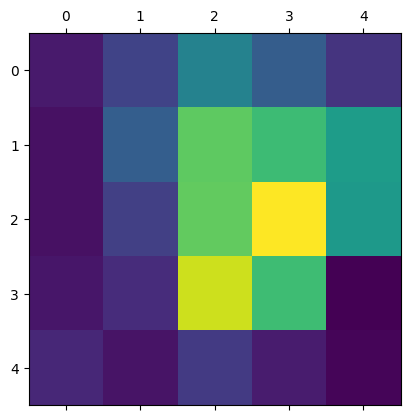

In [15]:
plt.matshow(heatmap)
plt.show()

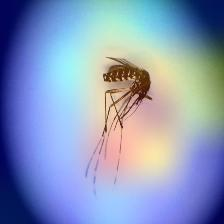

In [16]:
save_and_display_gradcam(os.path.join(aedes_dir, '0007.jpg'), heatmap, IMG_SIZE)